In [19]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\souvi\Downloads\Nashville_housing_data_2013_2016.csv')

In [2]:
df.isnull().sum()

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                       159
Suite/Condo                          50527
Property City                          159
Sale Date                                0
Sale Price                               0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Owner Name                           31375
Address                              30619
City                                 30619
State                                30619
Acreage                              30619
Tax District                         30619
Neighborhood                         30619
image                                31301
Land Value                           30619
Building Value                       30619
Total Value                          30619
Finished Area                        32470
Foundation 

In [3]:
suspect_cols = df.select_dtypes(include='object').columns
for col in suspect_cols:
    converted = pd.to_numeric(df[col], errors='coerce')
    if converted.notna().sum() > 0:
        print(f"{col} may be numeric but stored as text")
df['Suite/Condo'] = pd.to_numeric(df['Suite/Condo'], errors='coerce') 
df['Legal Reference'] = pd.to_numeric(df['Legal Reference'], errors='coerce')

Property Address may be numeric but stored as text
Suite/Condo may be numeric but stored as text
Legal Reference may be numeric but stored as text


In [51]:
df['Sale Date'] = pd.to_datetime(df['Sale Date'],dayfirst=True,errors='coerce')
df['sale_year']  = df['Sale Date'].dt.year
df['sale_month'] = df['Sale Date'].dt.month

In [5]:
print(df.dtypes)

Unnamed: 0                                    int64
Parcel ID                                    object
Land Use                                     object
Property Address                             object
Suite/Condo                                 float64
Property City                                object
Sale Date                            datetime64[ns]
Sale Price                                    int64
Legal Reference                             float64
Sold As Vacant                               object
Multiple Parcels Involved in Sale            object
Owner Name                                   object
Address                                      object
City                                         object
State                                        object
Acreage                                     float64
Tax District                                 object
Neighborhood                                float64
image                                        object
Land Value  

In [14]:
df.duplicated().any()

np.False_

In [18]:
df[df.duplicated(subset=['Parcel ID', 'Sale Date'], keep=False)]

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/Condo,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,...,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,sale_year,sale_month
52,52,173 09 0A 072.00,SINGLE FAMILY,7722 PORTER HOUSE DR,NaN,NASHVILLE,2013-01-07,161000,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1
53,53,173 09 0A 072.00,SINGLE FAMILY,7722 PORTER HOUSE DR,NaN,NASHVILLE,2013-01-07,161000,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1
148,148,128 03 0A 004.00,SINGLE FAMILY,413 CEDAR FOREST DR,NaN,NASHVILLE,2013-01-14,205000,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1
149,149,128 03 0A 004.00,SINGLE FAMILY,413 CEDAR FOREST DR,NaN,NASHVILLE,2013-01-14,205000,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1
641,641,081 07 0 021.00,SINGLE FAMILY,2107 18TH AVE N,NaN,NASHVILLE,2013-02-13,42500,NaN,No,...,1134.0,CRAWL,2010.0,FRAME,C,3.0,1.0,0.0,2013,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55962,55962,091 10 0 239.00,SINGLE FAMILY,5805 ROBERTSON AVE,NaN,NASHVILLE,2016-10-21,150000,NaN,No,...,784.0,CRAWL,1948.0,FRAME,C,2.0,1.0,0.0,2016,10
56114,56114,052 02 0 080.00,SINGLE FAMILY,633 CARMEL AVE,NaN,MADISON,2016-10-28,102000,NaN,No,...,1445.0,FULL BSMT,1960.0,BRICK,C,2.0,1.0,1.0,2016,10
56115,56115,052 02 0 080.00,SINGLE FAMILY,633 CARMEL AVE,NaN,MADISON,2016-10-28,102000,NaN,No,...,1445.0,FULL BSMT,1960.0,BRICK,C,2.0,1.0,1.0,2016,10
56117,56117,052 02 0 232.00,SINGLE FAMILY,327 HILLCREST DR,NaN,MADISON,2016-10-04,60000,NaN,No,...,1296.0,CRAWL,1950.0,BRICK,C,2.0,1.0,0.0,2016,10


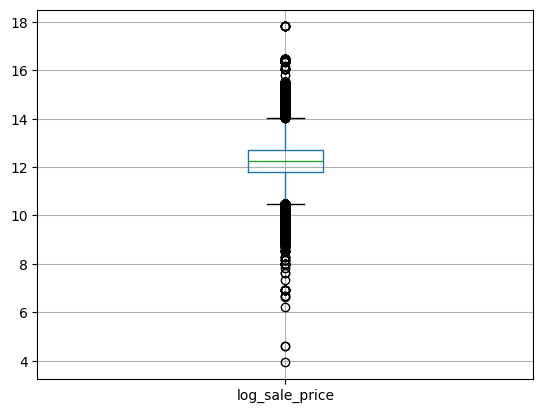

In [38]:
df['log_sale_price'] = np.log1p(df['Sale Price'])
df[['log_sale_price']].boxplot()
plt.show()

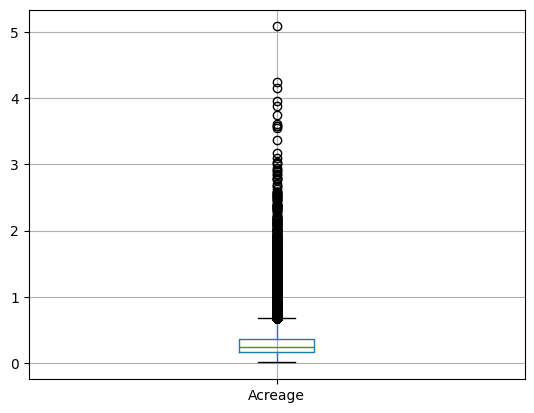

In [34]:
df['Acreage'] = np.log1p(df['Acreage'])
df[['Acreage']].boxplot()
plt.show()

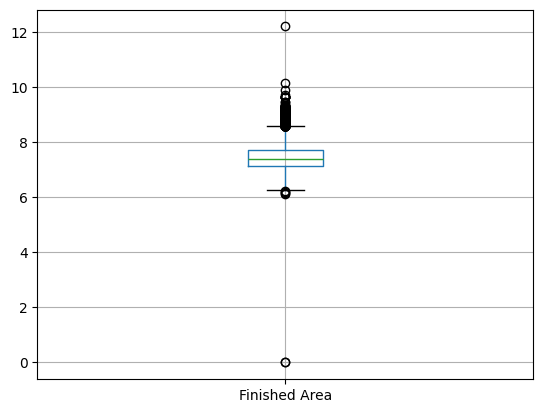

In [35]:
df['Finished Area'] = np.log1p(df['Finished Area'])
df[['Finished Area']].boxplot()
plt.show()


In [39]:
Q1 = df['Sale Price'].quantile(0.25)
Q3 = df['Sale Price'].quantile(0.75)
IQR = Q3 - Q1

sale_price_outliers = df[
    (df['Sale Price'] < Q1 - 1.5 * IQR) |
    (df['Sale Price'] > Q3 + 1.5 * IQR)
]

sale_price_outliers[['Parcel ID', 'Sale Price']].head()


,Parcel ID,Sale Price
96,092 16 0E 054.00,900000
114,104 09 0 011.00,899900
115,104 11 0 240.00,860000
136,117 04 0 166.00,989000
140,117 10 0 015.00,1435000


In [40]:
Q1 = df['Acreage'].quantile(0.25)
Q3 = df['Acreage'].quantile(0.75)
IQR = Q3 - Q1

sale_price_outliers = df[
    (df['Acreage'] < Q1 - 1.5 * IQR) |
    (df['Acreage'] > Q3 + 1.5 * IQR)
]

sale_price_outliers[['Parcel ID', 'Acreage']].head()


,Parcel ID,Acreage
127,115 08 0 089.00,0.970779
128,115 15 0 009.00,0.751416
140,117 10 0 015.00,0.947789
176,131 14 0 097.00,0.760806
177,131 16 0 039.00,0.858662


In [41]:
Q1 = df['Finished Area'].quantile(0.25)
Q3 = df['Finished Area'].quantile(0.75)
IQR = Q3 - Q1

sale_price_outliers = df[
    (df['Finished Area'] < Q1 - 1.5 * IQR) |
    (df['Finished Area'] > Q3 + 1.5 * IQR)
]

sale_price_outliers[['Parcel ID', 'Finished Area']].head()

,Parcel ID,Finished Area
140,117 10 0 015.00,8.817890
177,131 16 0 039.00,8.763458
193,144 06 0 010.00,9.036567
195,144 15 0 012.00,8.805975
202,158 03 0 003.00,8.831274


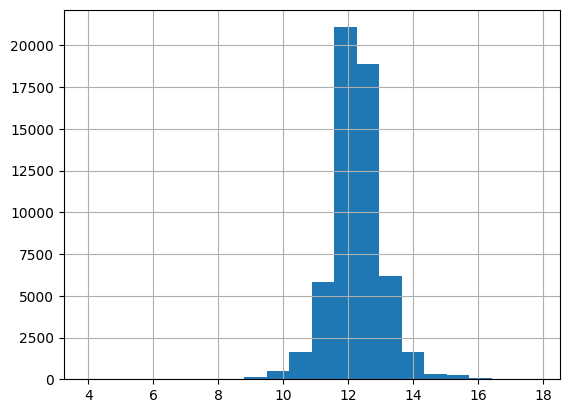

In [47]:
import numpy as np

df['log_sale_price'] = np.log1p(df['Sale Price'])
df['log_sale_price'].hist(bins=20)
plt.show()


In [49]:
df['price_per_sqft'] = df['Sale Price'] / df['Finished Area']
df['price_per_sqft']

0                 NaN
1        27172.689897
2        26419.760850
3         4171.206939
4        13446.195563
             ...     
56631             NaN
56632             NaN
56633             NaN
56634             NaN
56635             NaN
Name: price_per_sqft, Length: 56636, dtype: float64

In [53]:
df['property_age'] = df['sale_year'] - df['Year Built']
df.loc[df['property_age'] < 0, 'property_age'] = None
df['property_age']

0          NaN
1         72.0
2         13.0
3         65.0
4        103.0
         ...  
56631      NaN
56632      NaN
56633      NaN
56634      NaN
56635      NaN
Name: property_age, Length: 56636, dtype: float64

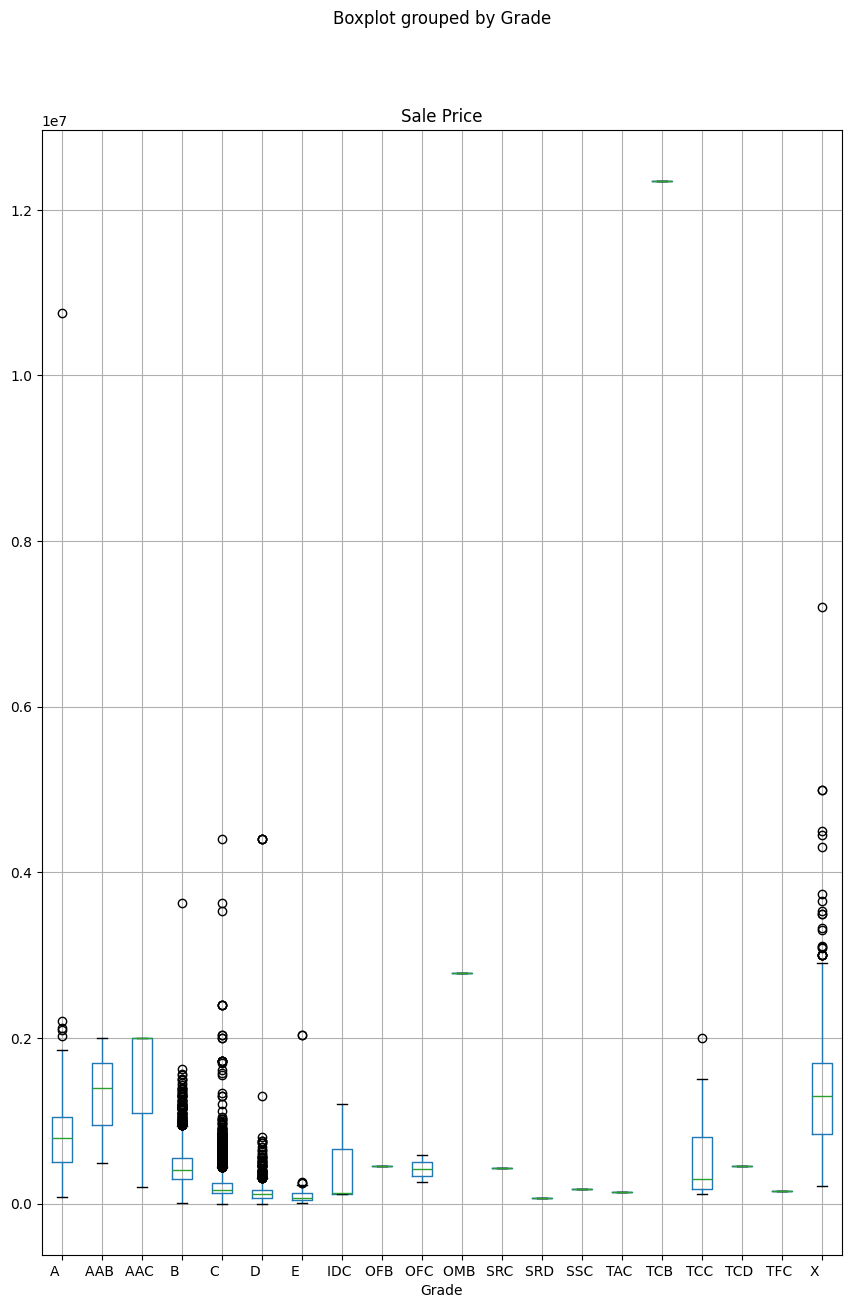

In [59]:
df.boxplot(column='Sale Price', by='Grade', figsize=(10,15))
plt.show()

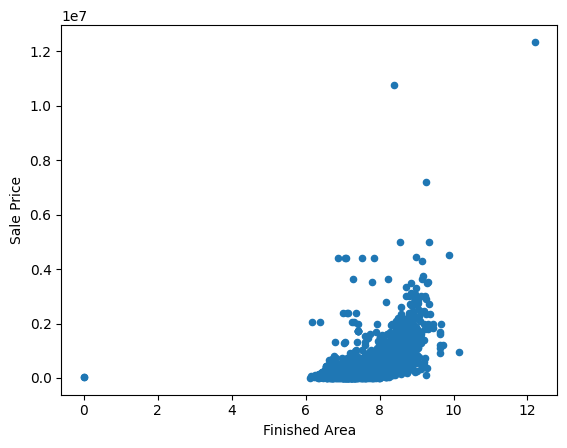